# 스타벅스 옆에 이디야가 위치할까?

## 정의
* 위치하다란, 스타벅스와 이디야의 분포를 통해 확인했을 때 두 커피숍의 분포가 유사하면 '위치'했다고 함
    * 하지만, 이런 정의는 너무 나이브(?) 하기 때문에 주의해야 하지만 가벼운 가설 검증으론 무관

## 설계
* 전국 좌표를 확인하는 것은 의미가 없으니, 서울을 중심으로 진행 후 전국 단위로 분석

In [32]:
# 1. 라이브러리 호출
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. 시각화 설정
from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline

# 3. 한글폰트를 설정(한글을 사용한다면 반드시해야 함)
#font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
#rc('font', family=font_name)
# 맥OS인 경우 위 두 줄을 입력하지 말고 아래 코드를 입력하세요
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 4. 해상도
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [33]:
df = pd.read_csv("data/part2_상가업소정보_201912_01.csv", sep='|')

# 필요한 데이터만 추출
* 서울 특별시 데이터만 추출

In [62]:
df_seoul = df[df['시도명'] == '서울특별시'].copy()

# 전처리
* 가벼운 처리를 위해서 스타벅스만 가져와보자

In [67]:
df_seoul_star = df_seoul[df_seoul['상호명'] == '스타벅스'].copy()

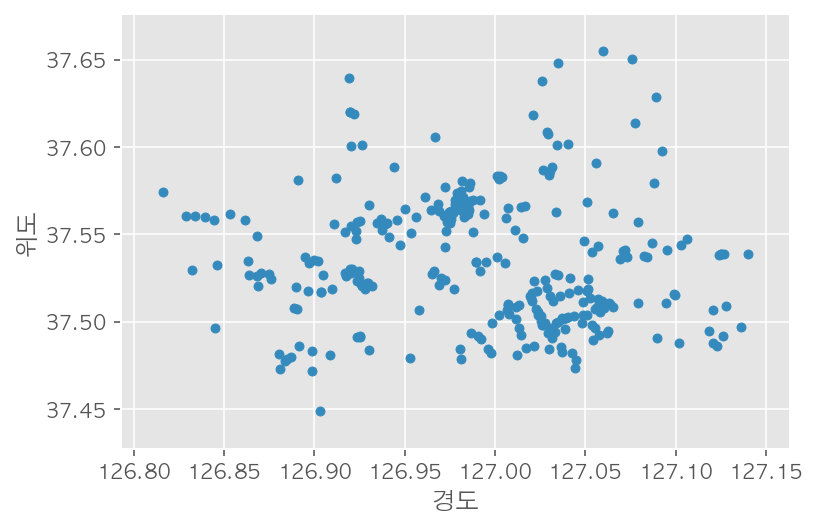

In [69]:
df_seoul_star[['위도','경도']].plot.scatter(x='경도',y='위도')

# 지도에 출력
* 중앙 좌표를 알아보자

In [70]:
import folium

In [71]:
lat = df_seoul_star['위도'].mean()
long = df_seoul_star['경도'].mean()
lat, long

(37.535005333597134, 126.991265023099)

In [84]:
m = folium.Map(location=[lat, long], zoom_start=12, tiles='Stamen Toner')

In [85]:
for i in df_seoul_star.index:
    circle_lat = df_seoul_star.loc[i, '위도']
    circle_long = df_seoul_star.loc[i, '경도']
    folium.CircleMarker(location=[circle_lat, circle_long], radius=5, color="green").add_to(m)

In [86]:
m